# Exercises

## Load the data in the folder `data/building_consumption` into a pandas dataframe.

Data is separated in different files. Don't forget to concatenate them, converte the date column to a datetime object and set it as index. Also, sort the index as the loading order might place reading on an unsorted order.

In [1]:
import os
import pandas as pd
import pandas_bokeh
import matplotlib.pyplot as plt
import numpy as np

# set pandas_bokeh to output inline
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [2]:
# get files in the folder ending with .csv
import glob
files = glob.glob('./../data/building_consumption/*.csv')
files.sort()
files

['./../data/building_consumption/20180831230000_20181231000000_Node 5.csv',
 './../data/building_consumption/20190101000000_20190427230000_Node 5.csv',
 './../data/building_consumption/20190430230000_20190830230000_Node 5.csv',
 './../data/building_consumption/20190831230000_20191231000000_Node 5.csv',
 './../data/building_consumption/20200101000000_20200429230000_Node 5.csv',
 './../data/building_consumption/20200430230000_20200830230000_Node 5.csv',
 './../data/building_consumption/20200831230000_20201231000000_Node 5.csv',
 './../data/building_consumption/20210101000000_20210429230000_Node 5.csv',
 './../data/building_consumption/20210430230000_20210830230000_Node 5.csv',
 './../data/building_consumption/20210831230000_20211231000000_Node 5.csv',
 './../data/building_consumption/20220101000000_20220429230000_Node 5.csv',
 './../data/building_consumption/20220430230000_20220830230000_Node 5.csv',
 './../data/building_consumption/20220831230000_20221231000000_Node 5.csv',
 './../data/

In [3]:
# load the files into a dataframe
df = pd.DataFrame()
for file in files:
    df_temp = pd.read_csv(file, header=0, sep=',',  parse_dates=True)
    df = pd.concat([df, df_temp], axis=0)
    print('loaded file', file, 'start date', df_temp['Timestamp'].min(), 'end date', df_temp['Timestamp'].max())

print('loaded dataframe with shape:', df.shape)

df.head()

loaded file ./../data/building_consumption/20180831230000_20181231000000_Node 5.csv start date 01/09/2018 00:00:00 end date 31/12/2018 00:30:00
loaded file ./../data/building_consumption/20190101000000_20190427230000_Node 5.csv start date 01/01/2019 00:00:00 end date 31/03/2019 23:30:00
loaded file ./../data/building_consumption/20190430230000_20190830230000_Node 5.csv start date 01/05/2019 00:00:00 end date 31/07/2019 23:30:00
loaded file ./../data/building_consumption/20190831230000_20191231000000_Node 5.csv start date 01/09/2019 00:00:00 end date 31/12/2019 00:30:00
loaded file ./../data/building_consumption/20200101000000_20200429230000_Node 5.csv start date 01/01/2020 00:00:00 end date 31/03/2020 23:30:00
loaded file ./../data/building_consumption/20200430230000_20200830230000_Node 5.csv start date 01/05/2020 00:00:00 end date 31/07/2020 23:30:00
loaded file ./../data/building_consumption/20200831230000_20201231000000_Node 5.csv start date 01/09/2020 00:00:00 end date 31/12/2020 0

Timestamp  Corrente A  Corrente B  Corrente C  Potencia   
0  31/08/2018 23:00:00         NaN         NaN         NaN       NaN  \
1  31/08/2018 23:30:00         NaN         NaN         NaN       NaN   
2  01/09/2018 00:00:00         NaN         NaN         NaN       NaN   
3  01/09/2018 00:30:00         NaN         NaN         NaN       NaN   
4  01/09/2018 01:00:00         NaN         NaN         NaN       NaN   

   Tensao A  Tensao B  Tensao C  energy cost 1  energy cost 2  energy cost 3  
0       NaN       NaN       NaN            NaN            NaN            NaN  
1       NaN       NaN       NaN            NaN            NaN            NaN  
2       NaN       NaN       NaN            NaN            NaN            NaN  
3       NaN       NaN       NaN            NaN            NaN            NaN  
4       NaN       NaN       NaN            NaN            NaN            NaN

In [4]:
# convert the date column to datetime. Dates have the format 31/07/2022 23:00:00
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %H:%M:%S')

# set the date column as index
df.set_index('Timestamp', inplace=True)

# sort the index
df.sort_index(inplace=True)

df.head()

Corrente A  Corrente B  Corrente C  Potencia  Tensao A   
Timestamp                                                                     
2018-08-31 23:00:00         NaN         NaN         NaN       NaN       NaN  \
2018-08-31 23:30:00         NaN         NaN         NaN       NaN       NaN   
2018-09-01 00:00:00         NaN         NaN         NaN       NaN       NaN   
2018-09-01 00:30:00         NaN         NaN         NaN       NaN       NaN   
2018-09-01 01:00:00         NaN         NaN         NaN       NaN       NaN   

                     Tensao B  Tensao C  energy cost 1  energy cost 2   
Timestamp                                                               
2018-08-31 23:00:00       NaN       NaN            NaN            NaN  \
2018-08-31 23:30:00       NaN       NaN            NaN            NaN   
2018-09-01 00:00:00       NaN       NaN            NaN            NaN   
2018-09-01 00:30:00       NaN       NaN            NaN            NaN   
2018-09-01 01:00:00       NaN       NaN            NaN            NaN   

                     energy cost 3  
Timestamp                           
2018-08-31 23:00:00            NaN  
2018-08-31 23:30:00            NaN  
2018-09-01 00:00:00            NaN  
2018-09-01 00:30:00            NaN  
2018-09-01 01:00:00            NaN

## Get the columns names for each type (Corrente, Potencia, Tensao, Cost

In [5]:
corrente_columns = [c for c in df.columns if 'Corrente' in c]
tensao_columns = [c for c in df.columns if 'Tensao' in c]
cost_columns = [c for c in df.columns if (('cost' in c) or ('Cost' in c))]
potencia_columns = [c for c in df.columns if 'Potencia' in c]

print('corrente_columns', corrente_columns)
print('tensao_columns', tensao_columns)
print('cost_columns', cost_columns)
print('potencia_columns', potencia_columns)

corrente_columns ['Corrente A', 'Corrente B', 'Corrente C']
tensao_columns ['Tensao A', 'Tensao B', 'Tensao C']
cost_columns ['energy cost 1', 'energy cost 2', 'energy cost 3']
potencia_columns ['Potencia']


## Do separeted plots for the "corrente", the "tensao", the "potencia" and the "cost" data

<Axes: xlabel='Timestamp'>

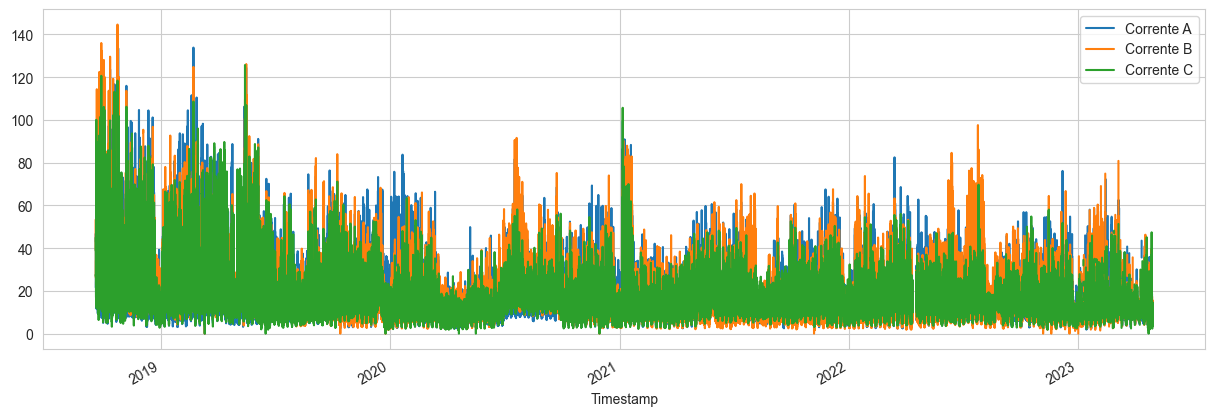

In [6]:
# plot the corrente data
df[corrente_columns].plot(figsize=(15, 5))

<Axes: xlabel='Timestamp'>

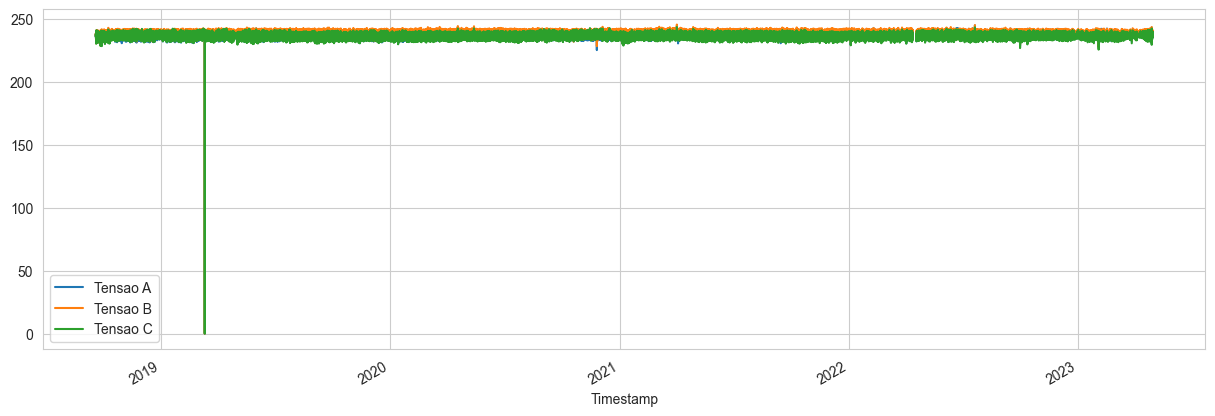

In [7]:
# plot the tensao data
df[tensao_columns].plot(figsize=(15, 5))

<Axes: xlabel='Timestamp'>

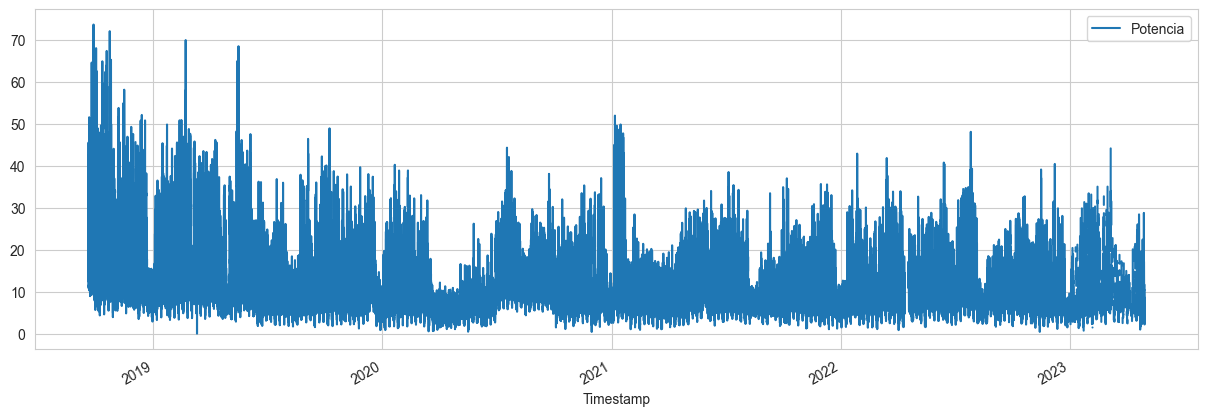

In [8]:
# plot the potencia data
df[potencia_columns].plot(figsize=(15, 5))

<Axes: xlabel='Timestamp'>

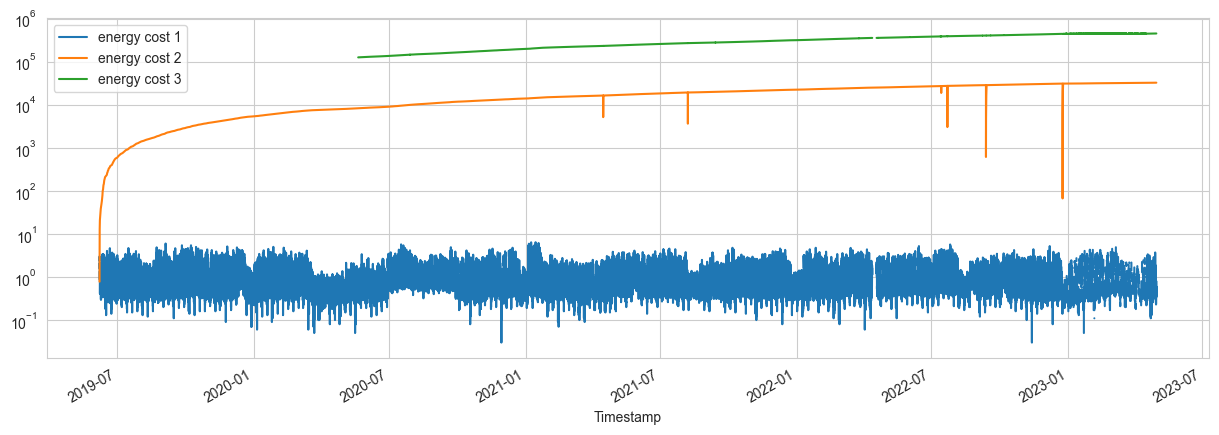

In [9]:
# plot the cost data (log scale)
df[cost_columns].plot(figsize=(15, 5), logy=True)

 ## Check if there are any missing values in the "potencia" and "corrente" columns. If there are, fill them with the previous value and plot (e.g., the potencia) them in a different color.

In [10]:
potencia_and_corrente_column = potencia_columns+corrente_columns
print(df[potencia_and_corrente_column].isna().sum())

Potencia      4508
Corrente A    4508
Corrente B    4508
Corrente C    4508
dtype: int64


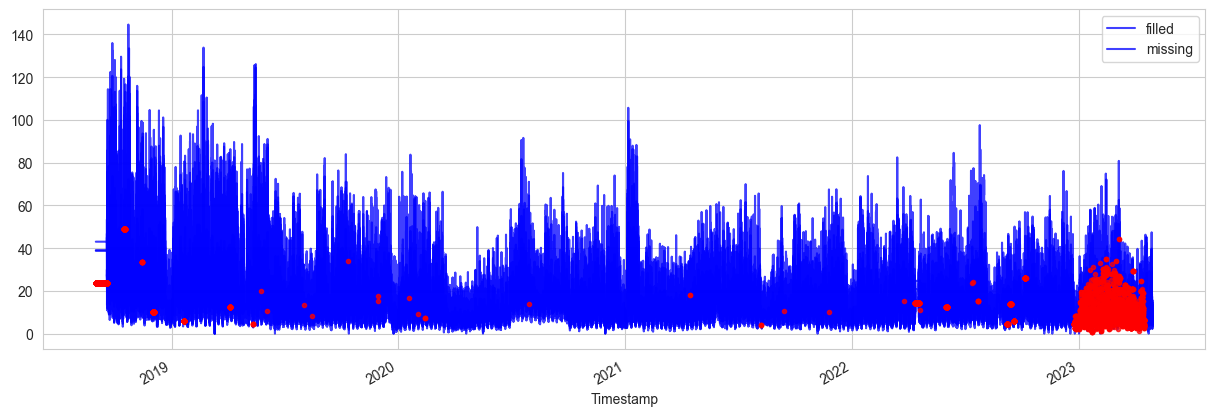

In [11]:
# save the indeces of the missing values
missing_values = df[potencia_and_corrente_column].isna().any(axis=1)

# fill the missing values with the previous value
df[potencia_and_corrente_column] = df[potencia_and_corrente_column].fillna(method='ffill').fillna(method='bfill')

# plot the data
ax = df[potencia_and_corrente_column].plot(figsize=(15, 5),
                               c='b',
                               alpha=0.75)

# plot the missing values
df.loc[missing_values, potencia_columns].plot(figsize=(15, 5),
                                              alpha=0.75,
                                              color='red',
                                              ax=ax,
                                              marker='.',
                                              linestyle='None')
ax.legend(['filled', 'missing'])

## Plot again the potencia's data. What do you observe? Can you spot the weekends? the holidays? the covid-19 lockdowns?
hint: plot data for seperate years

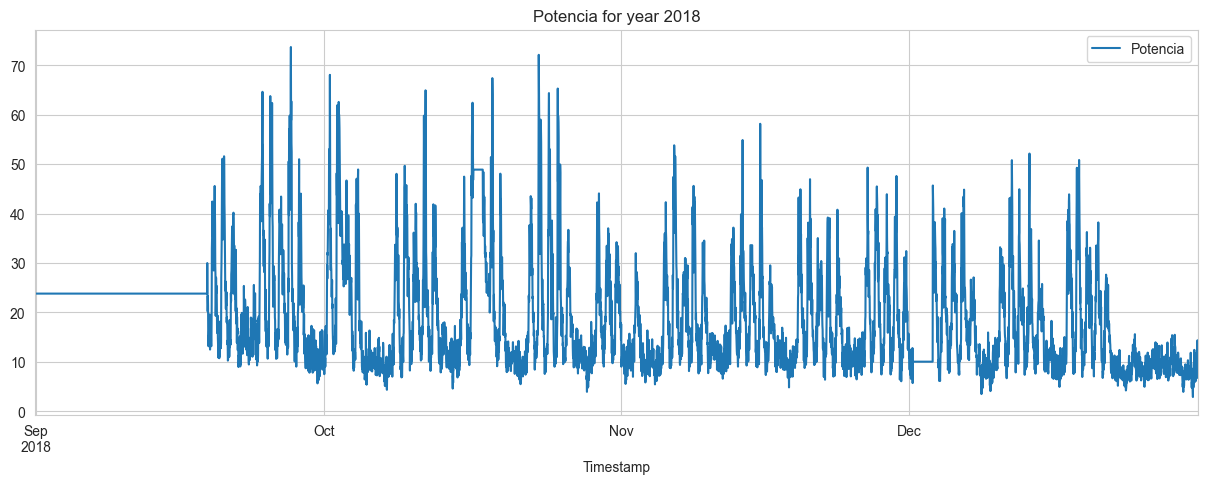

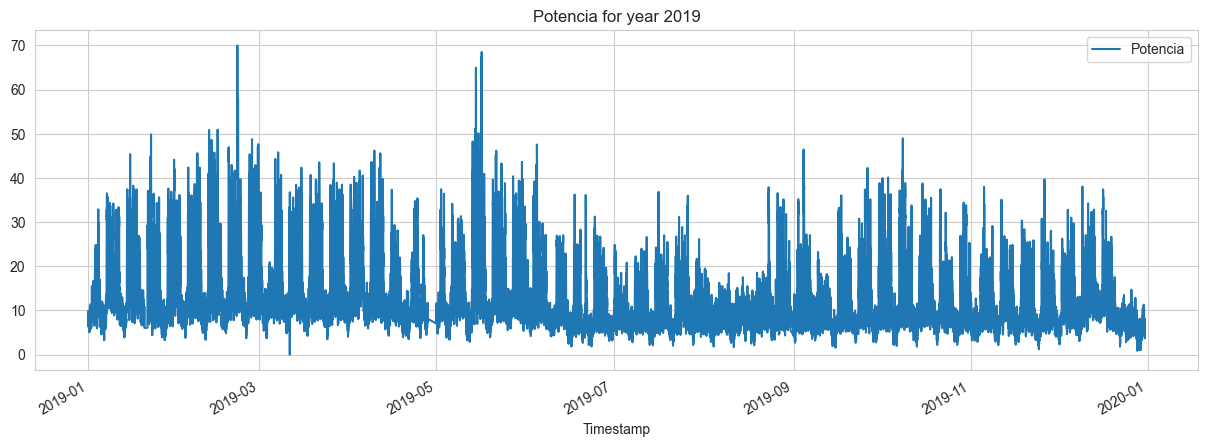

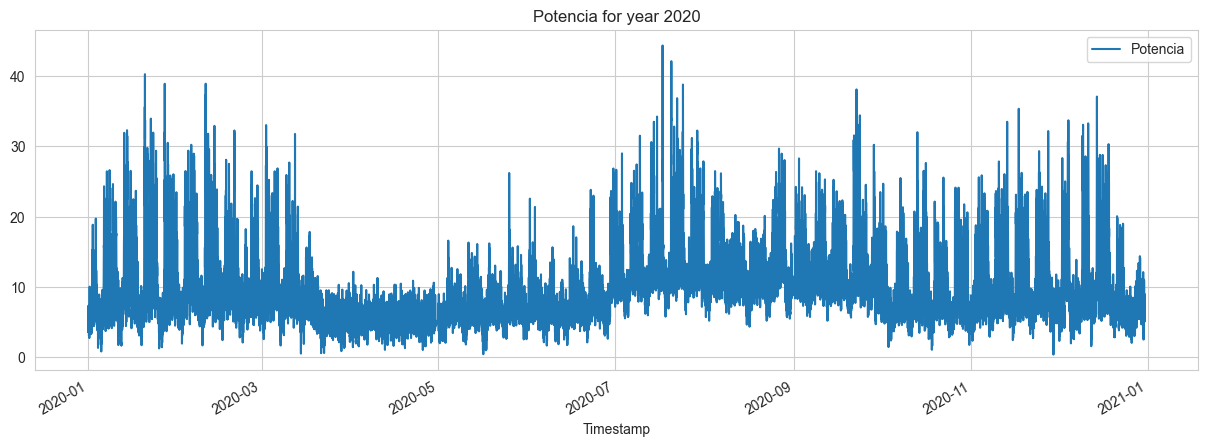

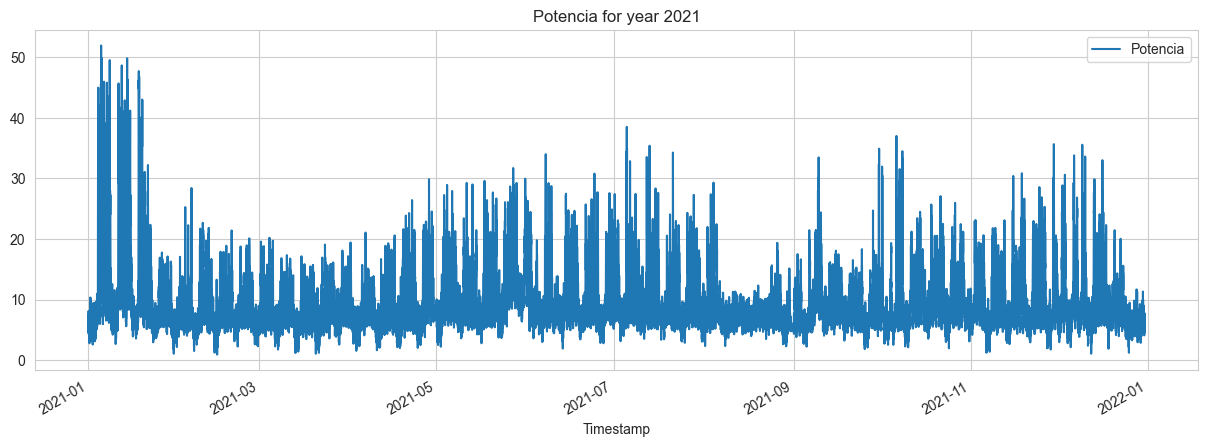

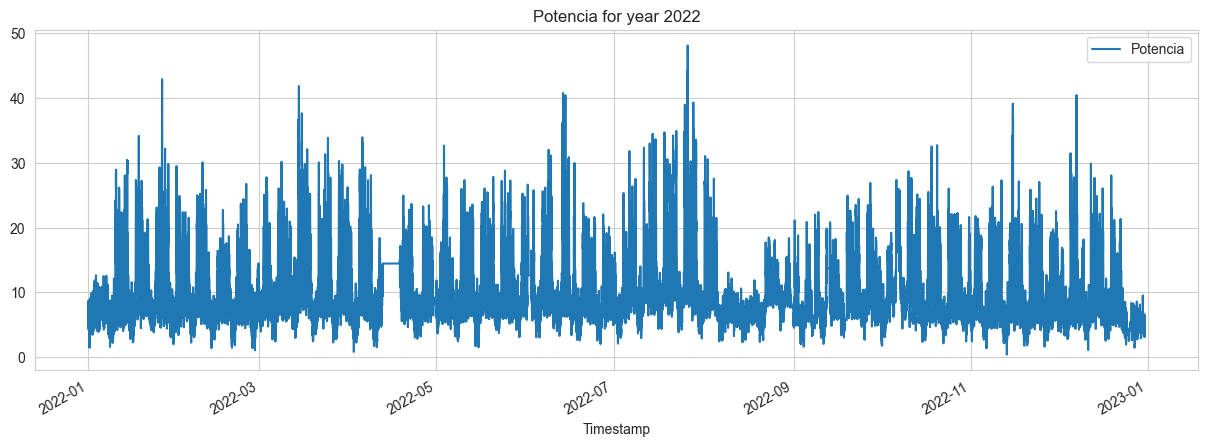

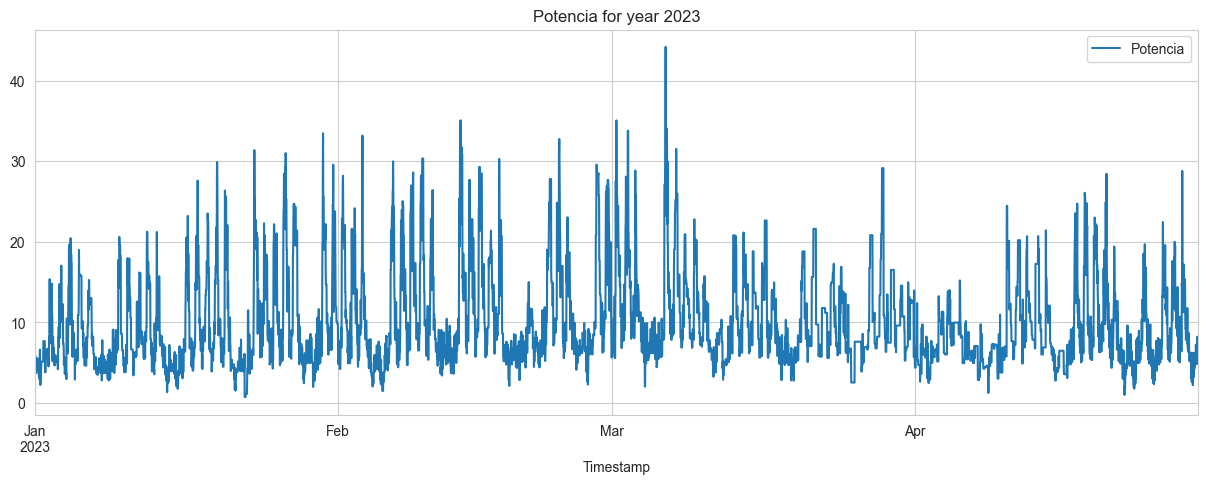

In [12]:
for year in range(2018, 2024):
    mask = df.index.year == year
    ax = df.loc[mask, potencia_columns].plot(figsize=(15, 5))
    ax.title.set_text('Potencia for year ' + str(year))

## Plot the data potencia's data for the months of February, March and April 2023. Can you spot the carnival holidays? And Easter?

<Axes: xlabel='Timestamp'>

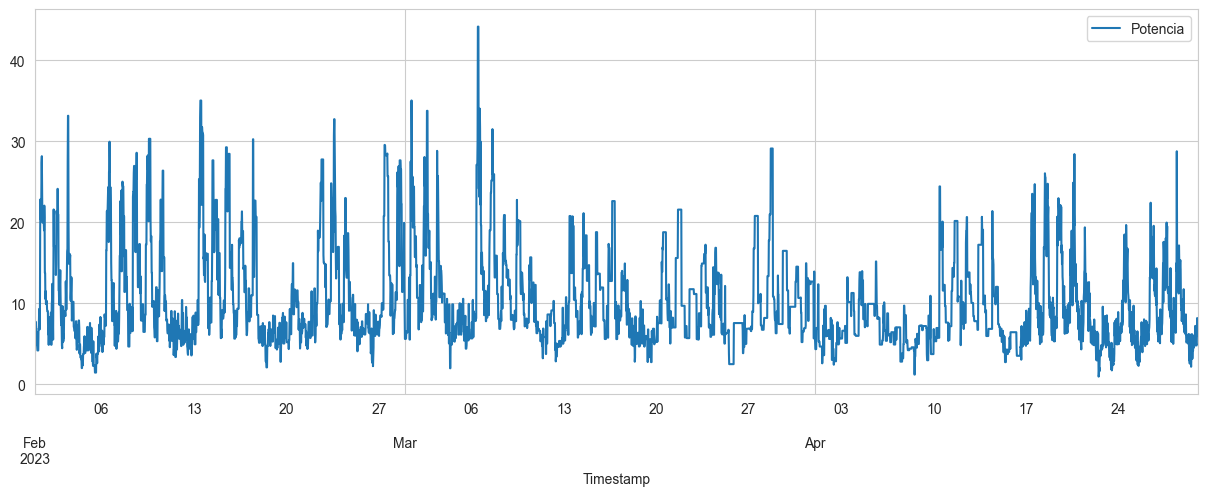

In [13]:
mask = (df.index.month >= 2) & (df.index.month <= 4) & (df.index.year == 2023)
df.loc[mask, potencia_columns].plot(figsize=(15, 5))

## Group the potencia's data by day of week and plot the mean consumption for each day.
Do your comment on the results?

<Axes: xlabel='Timestamp'>

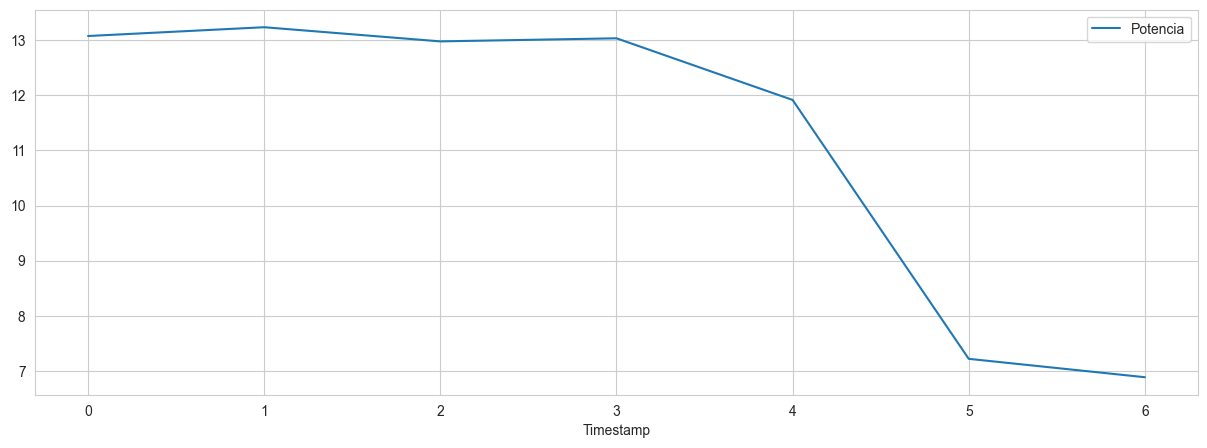

In [14]:
df.loc[:, potencia_columns].groupby(df.index.dayofweek).mean().plot(figsize=(15, 5))

## For the potencia's data, resample it by day and plot the min, mean and maximum consumption for each day.

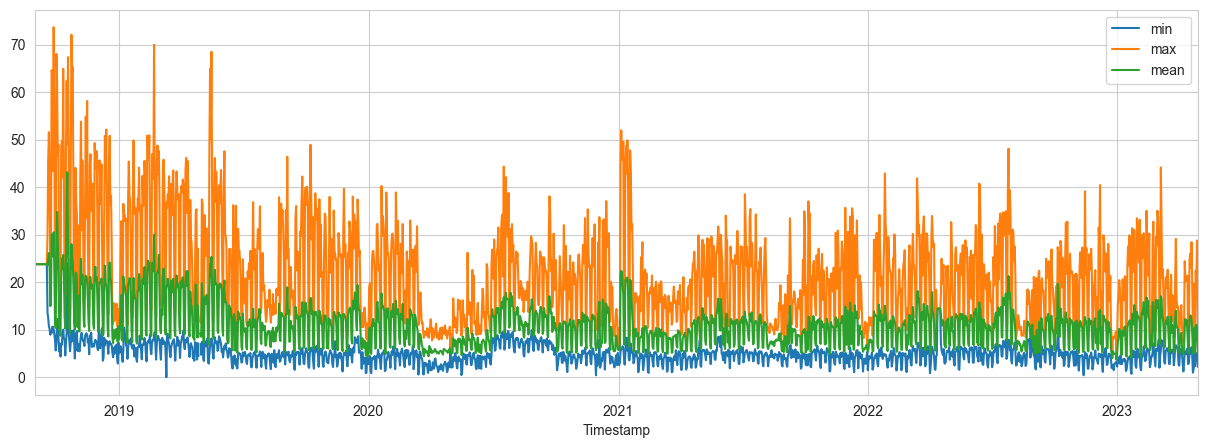

In [15]:
ax = df[potencia_columns].resample('D').min().plot(figsize=(15, 5))
df[potencia_columns].resample('D').max().plot(ax=ax)
df[potencia_columns].resample('D').mean().plot(ax=ax)

ax.legend(['min', 'max', 'mean'])

## Decompose the potencia's data into trend, seasonality and residuals (use the months of February to April 2023).

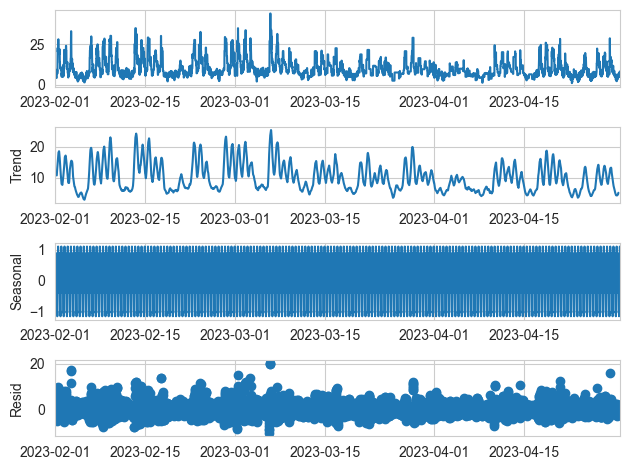

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

mask = (df.index.month >= 2) & (df.index.month <= 4) & (df.index.year == 2023)
decomposition = seasonal_decompose(df.loc[mask, potencia_columns], model='additive', period=24)

_ = decomposition.plot()


## Resample the potencia's data for daily values. Plot the data for 2023. Plot vertical lines each 7 days.

Can you spot the weekends? and the Carnaval holidays?


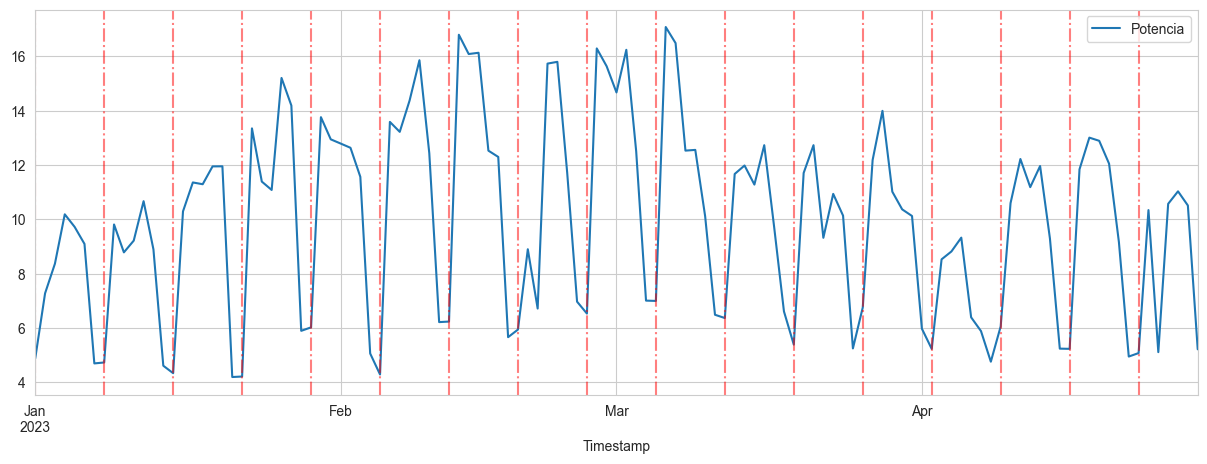

In [17]:
df_daily = df[potencia_columns].resample('D').mean().dropna()

mask = df_daily.index.year == 2023
df_daily[mask].plot(figsize=(15, 5))

# get the indices for the sundays
sundays = df_daily[mask].index.dayofweek == 6

# plot vertical lines each sunday
for i in df_daily[mask].index[sundays]:
    plt.axvline(i, color='red', alpha=0.5, linestyle='-.')

## Do the potencias's decomposition for the months 2023.
What should be the length of the period?

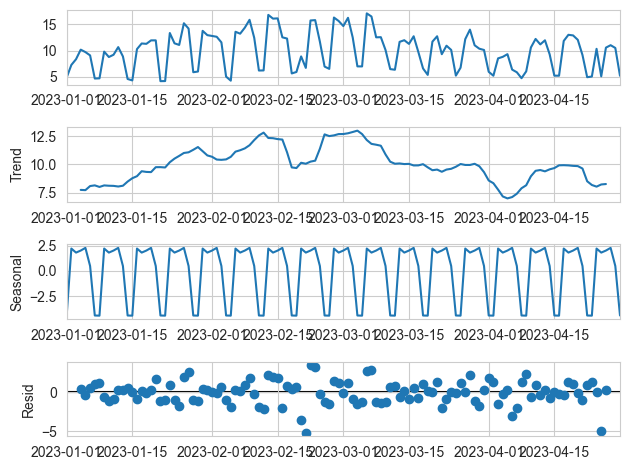

In [18]:
mask = df_daily.index.year == 2023
decomposition = seasonal_decompose(df_daily[mask], model='additive', period=7)
_ = decomposition.plot()

## Resample your potencia's data for weekly values and plot it

Can you associate the consumptions with the Covid-19 lock-down

<Axes: xlabel='Timestamp'>

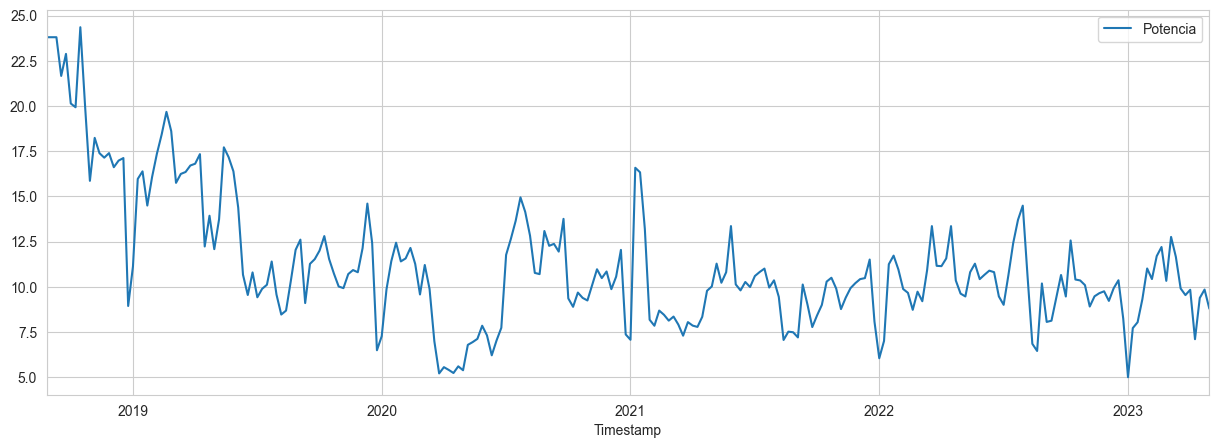

In [19]:
df_weekly = df[potencia_columns].resample('W').mean().dropna()
df_weekly.plot(figsize=(15, 5))


# Plot the tensao's data

<Axes: xlabel='Timestamp'>

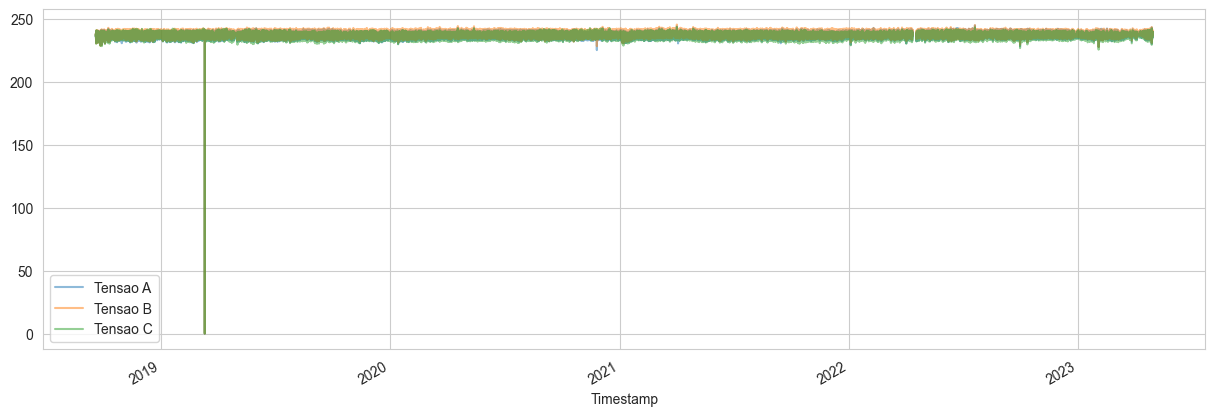

In [20]:
df[tensao_columns].plot(figsize=(15, 5), alpha=0.5)

## Find the places were the tensao was superior to 240V. Plot those values.

In [21]:
mask = (df[tensao_columns] > 240).any(axis=1)
mask

Timestamp
2018-08-31 23:00:00    False
2018-08-31 23:30:00    False
2018-09-01 00:00:00    False
2018-09-01 00:30:00    False
2018-09-01 01:00:00    False
                       ...  
2023-04-29 21:30:00    False
2023-04-29 22:00:00     True
2023-04-29 22:30:00     True
2023-04-29 23:00:00     True
2023-04-29 23:30:00     True
Length: 81004, dtype: bool

<Axes: xlabel='Timestamp'>

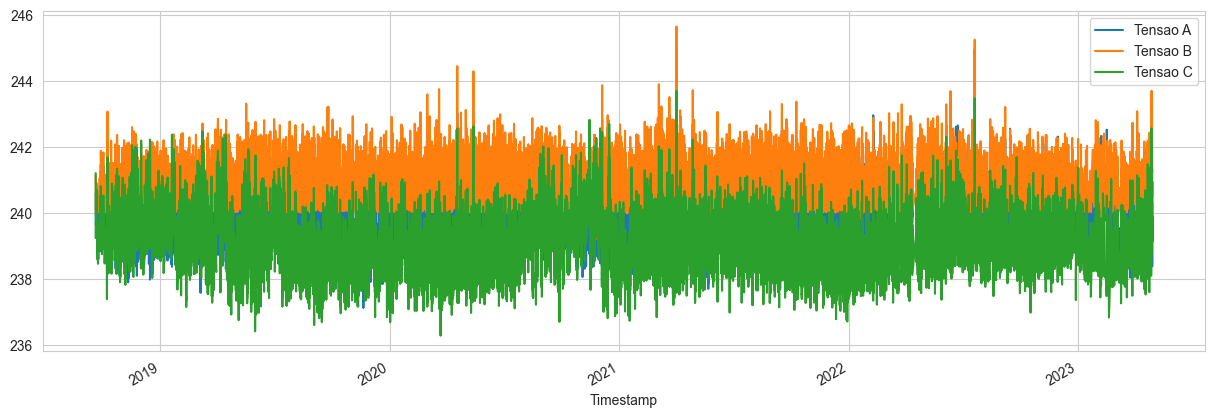

In [22]:
df.loc[mask, tensao_columns].plot(figsize=(15, 5))

In [23]:
df.loc[mask, tensao_columns].plot_bokeh(figsize=(800, 600))

Figure(id='1003', ...)

## Compute the autocorrelation of the corrent columns

Which conclusion can you take. E.g., justify that at a lag of $7\times2\times24$ provide beter results for the autocorrelation than a lag of $7\times24$.

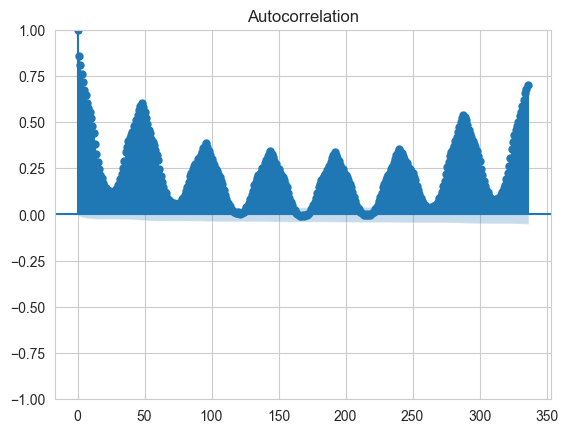

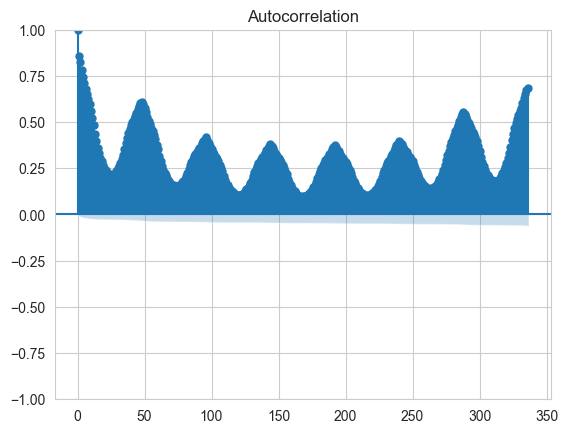

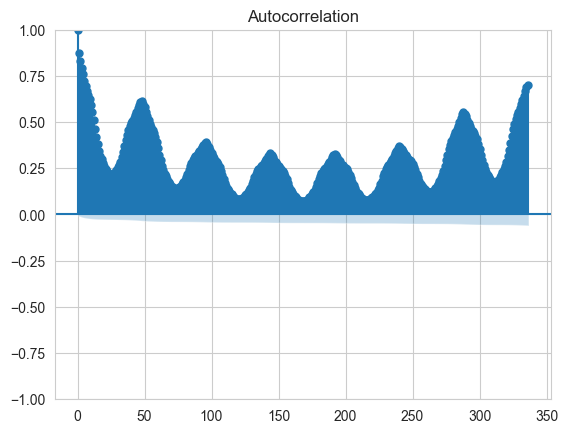

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

for c in corrente_columns:
    plot_acf(df[c], lags=7*2*24)

## Compute the autocorrelation of the corrent columns with the data resampled for daily values
Again, which conclusion can be taken? Why is the autocorrelation for a lag of $7$ better than for a lag of $1$?
Which lags can be considered as significantly more correlated?


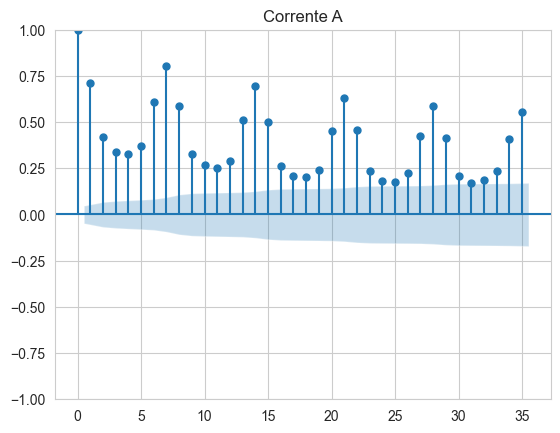

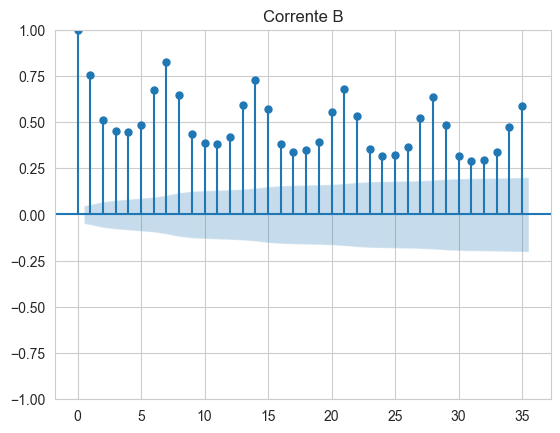

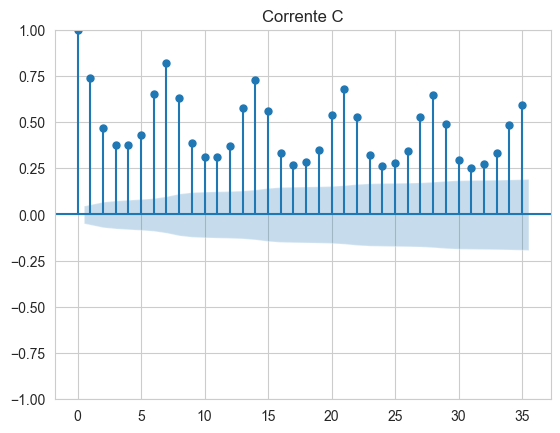

In [25]:
for c in corrente_columns:
    plot_acf(df[c].resample('D').mean().dropna(), lags=7*5, title=c)

## Use the moving average method to smooth the potencia's data. Plot the original data and the smoothed data.

Decide on the window size.

Hint: use the rolling method. Plot the data for the month of February 2023.

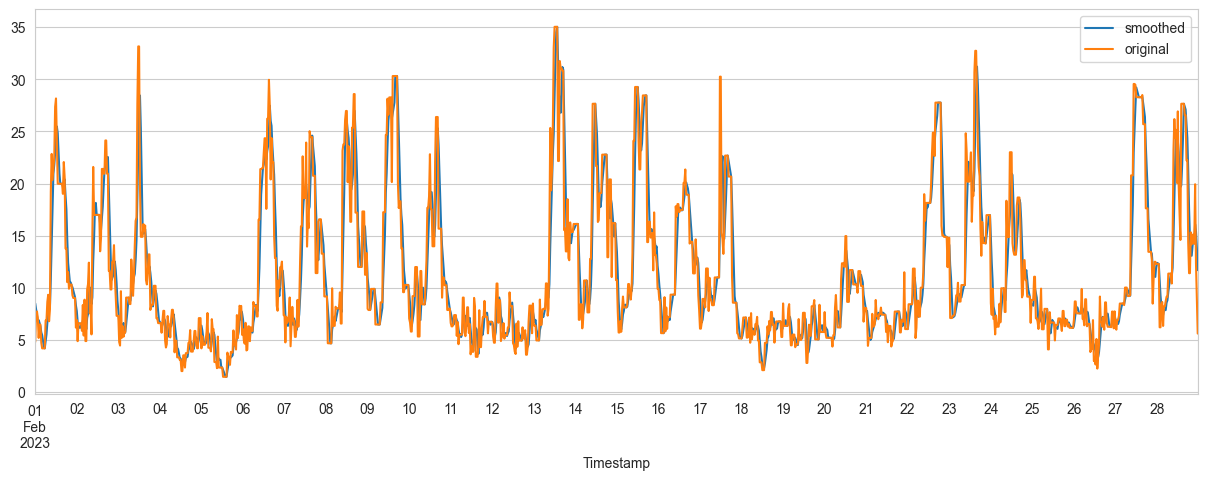

In [26]:
df_smooth = df[potencia_columns].rolling(4).mean()

# define a mask for the month of February 2023
mask = (df_smooth.index.month == 2) & (df_smooth.index.year == 2023)

# plot the smoothed data
ax = df_smooth.loc[mask, potencia_columns].plot(figsize=(15, 5))
df.loc[mask, potencia_columns].plot(figsize=(15, 5), ax=ax)
ax.legend(['smoothed', 'original'])


## Remove the smoothed data from the original data and plot the result

What were  to be these values if we consider the moving average method as the real consumption?

<Axes: xlabel='Timestamp'>

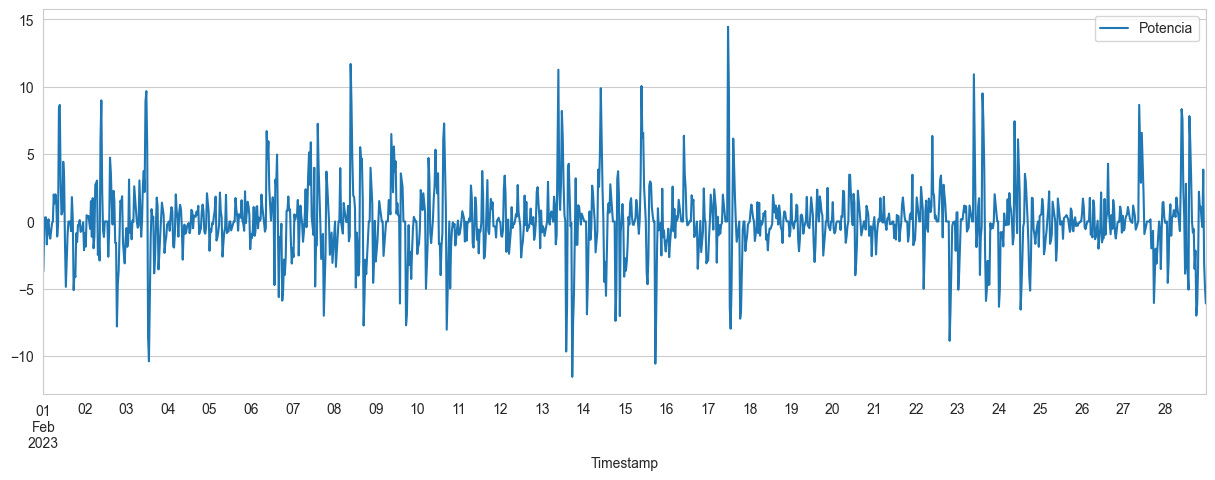

In [27]:
remaining = (df - df_smooth)
remaining.loc[mask, potencia_columns].plot(figsize=(15, 5))

## Do the same but now using the exponential moving average method
Can you spot the difference between the two methods?

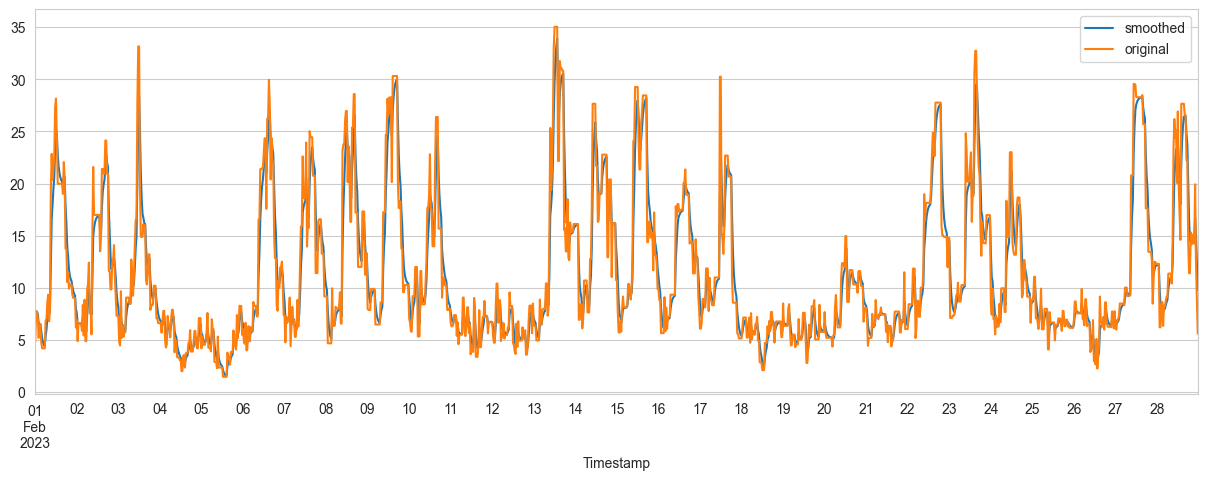

In [28]:
df_smooth_exp = df[potencia_columns].ewm(span=4).mean()

# define a mask for the month of February 2023
mask = (df_smooth_exp.index.month == 2) & (df_smooth_exp.index.year == 2023)

# plot the smoothed data
ax = df_smooth_exp.loc[mask, potencia_columns].plot(figsize=(15, 5))
df.loc[mask, potencia_columns].plot(figsize=(15, 5), ax=ax)
ax.legend(['smoothed', 'original'])


<Axes: xlabel='Timestamp'>

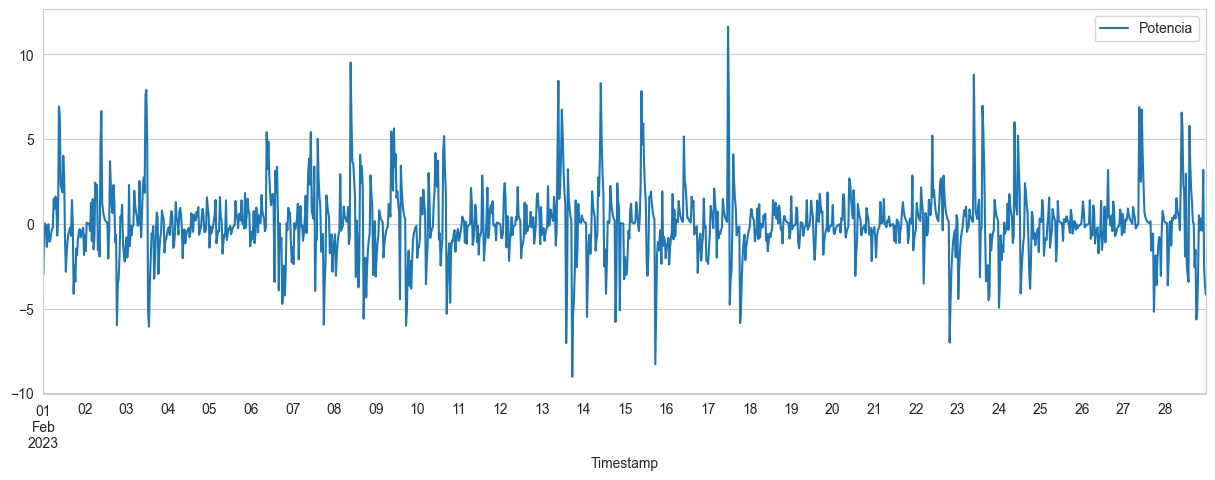

In [29]:
remaining_exp = (df - df_smooth_exp)
remaining_exp.loc[mask, potencia_columns].plot(figsize=(15, 5))

<Axes: xlabel='Timestamp'>

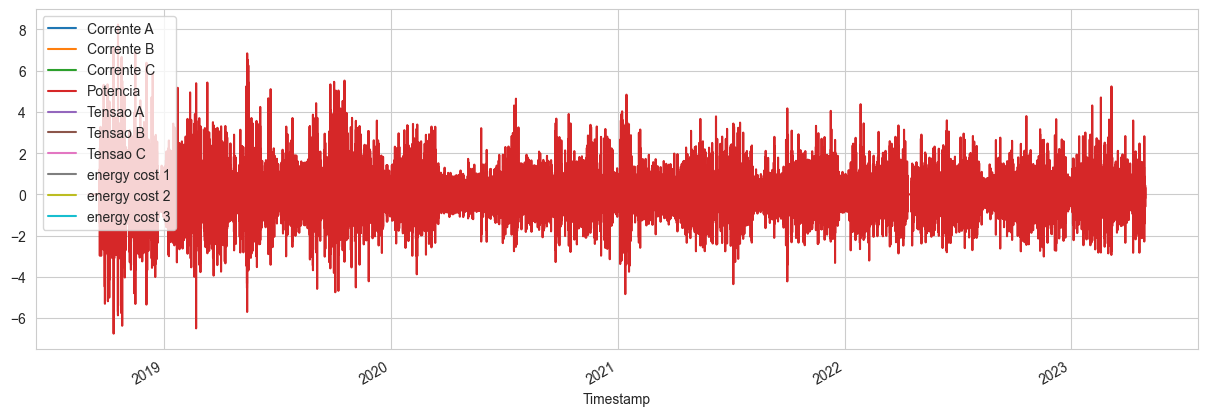

In [30]:
(remaining_exp - remaining).plot(figsize=(15, 5))

## Use the spectral analysis to compute the periodogram of the potencia's data. Plot the results resampled to hourly readings. Then use the 99.99 precentile to define a mask for the frequencies that are significant (power above the 99.99 percentile).

What is the periodicity that you find? Can you associate it with the daily or weekly periodicity?

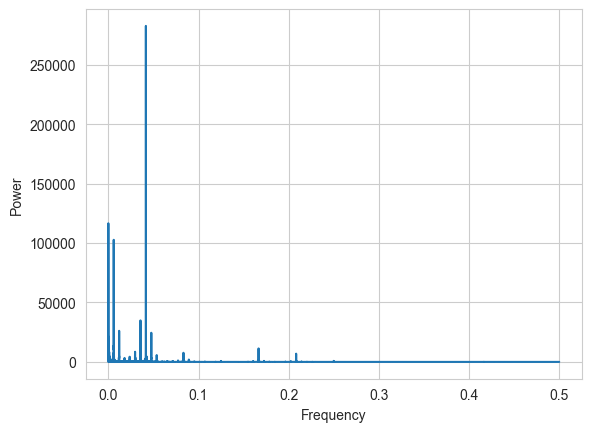

In [31]:
from scipy.signal import periodogram
import matplotlib.pyplot as plt
import numpy as np

potencia = potencia_columns[0]

# resample the data for hourly values
df_potencia = df[potencia].resample('H').mean().dropna()

freq, power = periodogram(df_potencia)

# Plot the power spectrum
plt.plot(freq, power)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

In [32]:
power_threshold = np.percentile(power, 99.99)
print('power_threshold =', power_threshold)

power_threshold = 101937.57252207412


In [33]:
peak_freq = freq[np.where(power > power_threshold)]
print('peak value', peak_freq)
print('periodicity in hours', 1/peak_freq)
print('periodicity in days', 1/peak_freq/24)

peak value [2.46901388e-05 5.99970372e-03 4.16522641e-02]
periodicity in hours [4.05020000e+04 1.66674897e+02 2.40082988e+01]
periodicity in days [1.68758333e+03 6.94478738e+00 1.00034578e+00]


## Do the same thing as before but now for the potencia's data resampled for daily values (define your own threshold)

What is the periodicity that you find? Can you associate it with the weekly periodicity of the potencia's data? Why?

Text(0, 0.5, 'Power')

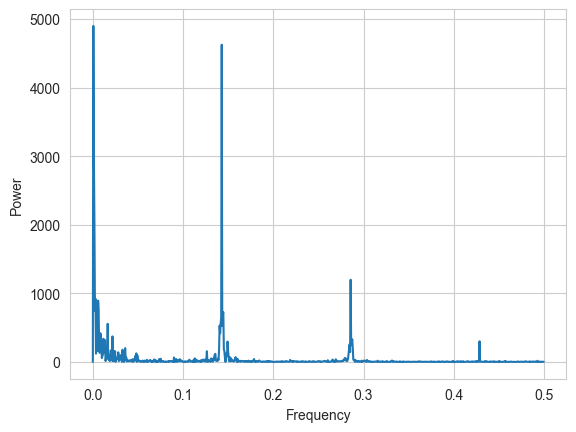

In [34]:
df_potencia_daily = df[potencia].resample('D').mean().dropna()

freq, power = periodogram(df_potencia_daily)

# Plot the power spectrum
plt.plot(freq, power)
plt.xlabel('Frequency')
plt.ylabel('Power')

In [35]:
power_threshold = np.percentile(power, 99.5)
print('power_threshold =', power_threshold)

peak_freq = freq[np.where(power > power_threshold)]

print('peak value', peak_freq)
print('periodicity in days', 1/peak_freq)

power_threshold = 1128.588350016012
peak value [0.00058789 0.00117578 0.00176367 0.14285714 0.28571429]
periodicity in days [1701.   850.5  567.     7.     3.5]


## Compute the correlation between the potencia's data and the corrente's data.

In [36]:
for col in corrente_columns:
    print('correlation between', col, 'and Potencia =', df[col].corr(df[potencia]))

correlation between Corrente A and Potencia = 0.926743630454866
correlation between Corrente B and Potencia = 0.9289570613673003
correlation between Corrente C and Potencia = 0.9001290288470717
